# Reading the SIMBA buoy supplementary data

The SIMBA instruments contain compass data to enable tracking of ice floe rotation. We will need to make an estimate of the accuracy of this information. They also contain additional surface meteorology measurements (pressure, temperature) that we can use if needed. 

To start with, here is the code snippet I used to extract the data from the .tab files.

In [10]:
import pandas as pd
import proplot as pplt
import numpy as np
import os

dataloc = '../data/simba_data/raw/'
saveloc = '../data/simba_data/clean/'
os.makedirs(saveloc, exist_ok=True)

aux_data = {}
for file in os.listdir(dataloc):
    idx = 0
    with open(dataloc + file) as f:
        lines = f.readlines()
        for l in lines:
            if '*/' in l:
                break
            else:
                idx += 1
        aux_data[file.split('_')[0]] = pd.read_table(dataloc+file, skiprows=idx + 1,
                                                     index_col='Date/Time', parse_dates=True)

aux_data = {buoy: aux_data[buoy] for buoy in aux_data if 'Compass bearing [deg]' in aux_data[buoy].columns}

####
# can add some steps here for cleaning 
# in particular, I think some buoys have reversals in the time series
####

for buoy in aux_data:
    aux_data[buoy].to_csv(saveloc + buoy + '.csv')
    

The additional data can tell you something about the data quality, and the eventual fate of the sensor. For example, the tilt can show you if the buoy is starting to experience ice breakup, or if the instrument tips over.

<AxesSubplot:xlabel='Date/Time'>

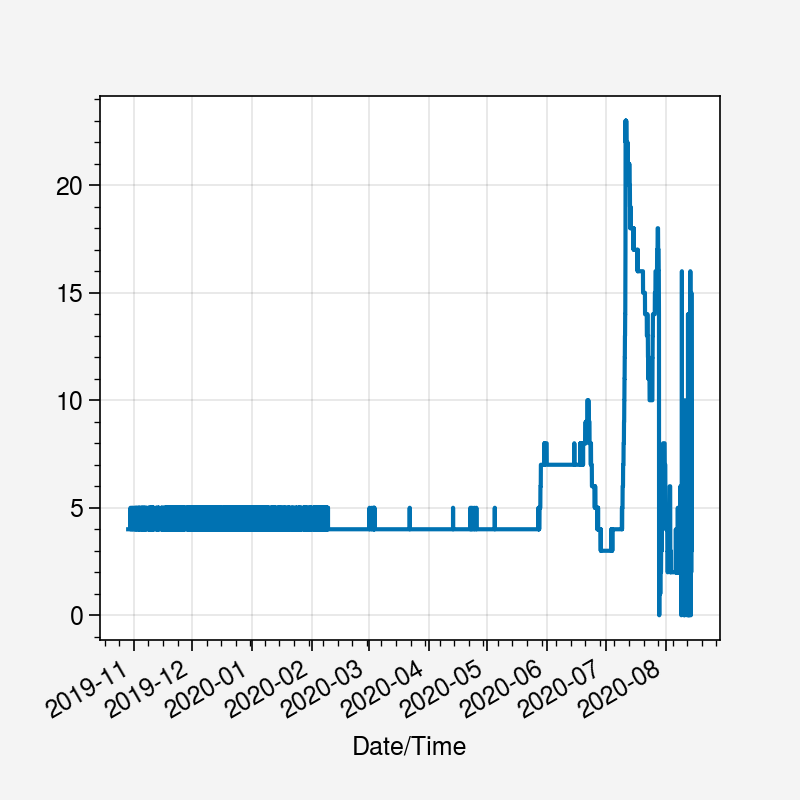

In [12]:
aux_data['2019T66']['Tilt [deg]'].plot()